## Introduction to Statistics

In [1]:
import pandas as pd
import numpy as np

In [2]:
medal_count = pd.read_excel('archive\Medals.xlsx')

d:\Statistics\States\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
medal_count.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


### Measure of central tendancy

In [4]:
# Mean : Sum of all values divided by number of values
medal_count["Total"].mean()

11.612903225806452

- **Weighted Mean** : Same as mean, except we multiply every value by some x<subscript>i</subscript> before adding them up and dividing by the number of instances.        
- Not all instances are equally valuable so we might want to add or subtract wieght.

In [5]:
# Weighted Mean
np.average(medal_count['Total'], weights=medal_count['Gold'])

46.832352941176474

- **Trimmed Mean** : Remove the top and bottom x values from the the dataset then calculate the mean.
- Helps reduce the impact of the outliers. Used in Intertnational Diving competitions where the top and bottom scores aren't counted when calculating a diver's mean score. 

In [6]:
from scipy.stats import trim_mean
trim_mean(medal_count['Gold'],.05),np.mean(medal_count['Gold']) 
# a trim percentage of 10% (0.1), meaning you removed the lowest and highest 10% of values.
# Robust : A robust metric is not sensitive to outliers.

(2.5176470588235293, 3.6559139784946235)

**Median** : A middle value in a sorted list of values             

**Weighted mean** : We multiply every value with some weight x<subscript>i</subscript> and then pich the middle value scuh that the sum od the values to the left of median are the same as the sum of values to the rights of the median. 

In [7]:
# Median 
medal_count['Total'].median()

4.0

In [8]:
# Weighted Median
def Weighted_median(df,median_col,weight_col):
    df_sorted = df.sort_values(median_col) # Sort whole table w.r.t median column
    cumsum = df_sorted[weight_col].cumsum()
    cutoff = df_sorted[weight_col].sum()/2
    Filtered_data = df_sorted[cumsum>= cutoff] # Filtering Dataset based on condition
    return Filtered_data['Total'].iloc[0]

Weighted_median(medal_count,'Total','Gold')

40

**Mode** : Most frequent element

In [9]:
# Mode 
import scipy.stats as stats
stats.mode(medal_count['Total'])

ModeResult(mode=1, count=17)

**Pecentile** : The value such that P percent of the data lies below it                

**Outliers** : A value that is very diffrent from most of the data.

In [10]:
q1 = np.percentile(medal_count["Total"],25) # First Quartile
print(q1)
q2 = np.percentile(medal_count["Total"],50) # Second Quartile
print(q2)
q3 = np.percentile(medal_count["Total"],75) # Third  Quartile
print(q3)

2.0
4.0
11.0


In [11]:
medal_count.describe() # Gives complete complete statistics analysis of Dataset

,Rank,Gold,Silver,Bronze,Total,Rank by Total
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,46.333333,3.655914,3.634409,4.322581,11.612903,43.494624
std,26.219116,7.022471,6.626339,6.210372,19.091332,24.171769
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,24.000000,0.000000,0.000000,1.000000,2.000000,23.000000
50%,46.000000,1.000000,1.000000,2.000000,4.000000,47.000000
75%,70.000000,3.000000,4.000000,5.000000,11.000000,66.000000
max,86.000000,39.000000,41.000000,33.000000,113.000000,77.000000


### Measure of Dispersion
- **Deviations** : The diffrence between observed values and estimate of location. Also called Errors or Residuals.         

-  **Variance** : measure of the degree to which data points in a dataset differ from the mean (average) value. It quantifies the average of the squared differences between each data point and the mean.

- **Standard Deviation** : Standard deviation is another measure of the spread of data points in a dataset. It is simply the square root of the variance and is often used because it is in the same units as the original data.

In [12]:
# Variance
medal_count["Total"].var()

364.47896213183753

In [13]:
# Standard Deviation
medal_count["Total"].std()

19.09133212041102

In [14]:
from statistics import variance, stdev 

In [15]:
print(f"Variance : {variance(medal_count['Total'])}")
print(f"Standard Deviation : {stdev(medal_count['Total'])}")

Variance : 364.4789621318373
Standard Deviation : 19.091332120411014


**Mean Absolute Deviation** : MAD is a statistical measure that quantifies the average absolute difference between each data point in a dataset and the mean (average) of that dataset. It provides a measure of the average absolute deviation from the mean.It is also knownas l1-norm or Manhattan Norm.          

**Medain absolute deviation** : MeAD is a statistical measure that quantifies the median of the absolute differences between each data point in a dataset and the median of that dataset. It provides a measure of the central tendency of absolute deviations.

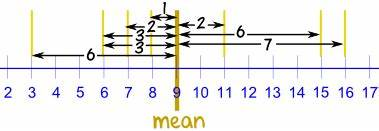

In [16]:
print(f"MAD : {np.mean(np.absolute(medal_count['Total'] - np.mean(medal_count['Total'])))}")
print(f"MeAD : {np.median(np.absolute(medal_count['Total'] - np.median(medal_count['Total'])))}")

MAD : 11.602497398543179
MeAD : 3.0


In [17]:
def Columns_M_C_T(Data):
    for i in Data.columns:
        print(f"Column Nmae : {i}")
        print(f"Mean of {i} : ",round(np.mean(Data[i]),2))
        print(f"Median of {i} : ",np.median(Data[i]))
        print(f"Mode of {i} : ",stats.mode(Data[i]))
        print(f"Varince of {i} : {round(np.var(Data[i]),2)}")
        print(f"Standard Devaition of {i} : {round(np.std(Data[i]),2)}")
        #fig,axes = plt.subplots(figsize = (5,5))
        #sb.histplot(Data[i],kde = True)
        print()

In [18]:
iris_datasete = pd.read_csv("iris\iris.data")
iris_data = iris_datasete.copy()
Columns_M_C_T(iris_data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']])

Column Nmae : sepal length (cm)
Mean of sepal length (cm) :  5.84
Median of sepal length (cm) :  5.8
Mode of sepal length (cm) :  ModeResult(mode=5.0, count=10)
Varince of sepal length (cm) : 0.68
Standard Devaition of sepal length (cm) : 0.83

Column Nmae : sepal width (cm)
Mean of sepal width (cm) :  3.05
Median of sepal width (cm) :  3.0
Mode of sepal width (cm) :  ModeResult(mode=3.0, count=26)
Varince of sepal width (cm) : 0.19
Standard Devaition of sepal width (cm) : 0.43

Column Nmae : petal length (cm)
Mean of petal length (cm) :  3.76
Median of petal length (cm) :  4.35
Mode of petal length (cm) :  ModeResult(mode=1.5, count=14)
Varince of petal length (cm) : 3.09
Standard Devaition of petal length (cm) : 1.76

Column Nmae : petal width (cm)
Mean of petal width (cm) :  1.2
Median of petal width (cm) :  1.3
Mode of petal width (cm) :  ModeResult(mode=0.2, count=28)
Varince of petal width (cm) : 0.58
Standard Devaition of petal width (cm) : 0.76



**Range** : Diffrence between the largest and samllest values in the dataset.          

**Order Statistics** : Metric based on the data values sorted from smallest to biggest.                

**Percentile** : The value is greater then P percent of values in the dataset.           

**Interquartile Range** : Diffrenxe between the 75th and 25th percentile.                    
 <pre>           IQR = Q3 - Q1        </pre> 
 

In [19]:
q1 = np.percentile(medal_count["Total"],25) # First Quartile
print("Q1 :",q1)
q2 = np.percentile(medal_count["Total"],50) # Second Quartile
print("Q2 :",q2)
q3 = np.percentile(medal_count["Total"],75) # Third  Quartile
print("Q3 :",q3)
print(f"Interquartile Range : Q3 - Q1 = {q3-q1}")

Q1 : 2.0
Q2 : 4.0
Q3 : 11.0
Interquartile Range : Q3 - Q1 = 9.0


### Standard Deviation of Related Estimates       
- Mean absolute deviation is one method to measure variablity. It is simply the sum of the absolute values of all deviations(value - mean) divided by the number of instances.     
- other metrics include the variance is an average os squared deviations, and the standard devioation is the square root of the variance.       
- One reason that people tend to prefer standard deviation to the variance, is that the standard deviation operates on the same scale as the rest of the data.      
- All three of these metrices are not robust against outliers and the variance and standard deviation are particullary susceptible to outliers because how they square thier devaitions.       
- The median absolute deviation is robust against outliers and is calculated by taking the median of the absolute value of all values - the median.
- The Variance, Standard deviation, mean absolute deviation, and median absolute deviation are not equivalente estimate.
<pre>                    STD > MAD > MeAD </pre>

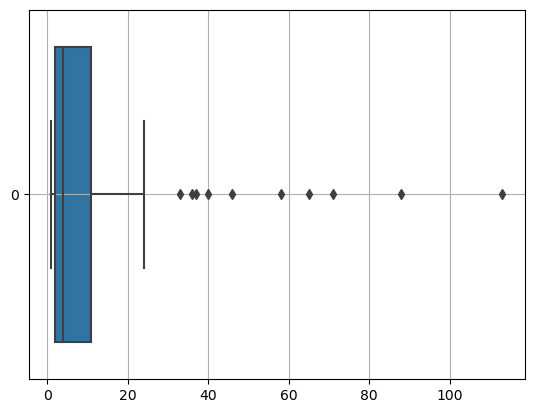

In [20]:
%matplotlib inline
import seaborn as sb 
import matplotlib.pyplot as plt
sb.boxplot(medal_count['Total'],orient= 'h')
plt.grid()
plt.show()

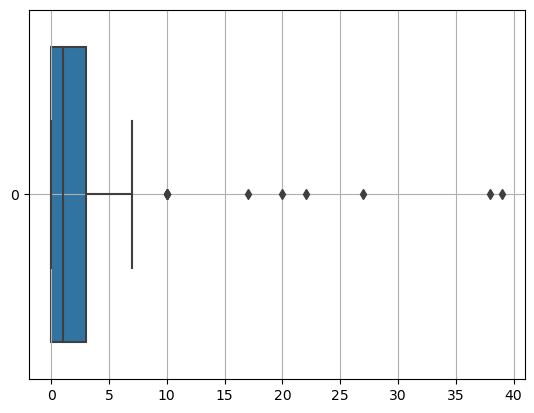

In [21]:
sb.boxplot(medal_count['Gold'],orient= 'h')
plt.grid()
plt.show()

#### Frequency Distribution

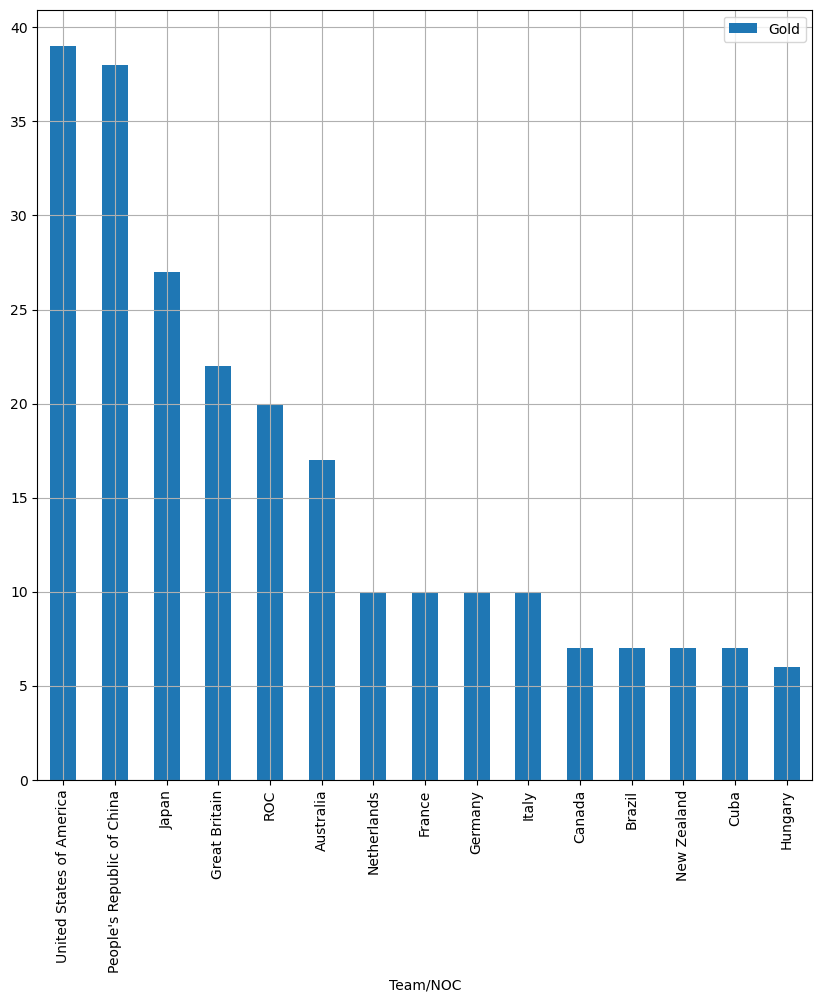

In [22]:
# Bar-plot
fig,axes = plt.subplots(figsize = (10,10))
medal_count.iloc[0:15].plot(x='Team/NOC', y='Gold', kind='bar',ax = axes)
plt.grid()
plt.show()


In [23]:
# frequency Table
frequency_table = medal_count.copy()
frequency_table["freq"] = pd.cut(medal_count['Gold'],10)
""" pd.cut() function is used to create discrete bins or intervals into which the values from the 'Gold' column will be categorized. It essentially discretizes continuous data. In your code, it is applied to the 'Gold' column.""""Data Structure and Algorithmic Thinking with Python Data Structure and Algorithmic Puzzles - PDF Room.pdf""""Data Structure and Algorithmic Thinking with Python Data Structure and Algorithmic Puzzles - PDF Room.pdf"""
#print(frequency_table['freq'])
X = frequency_table.groupby('freq')["Rank"].count().reset_index()

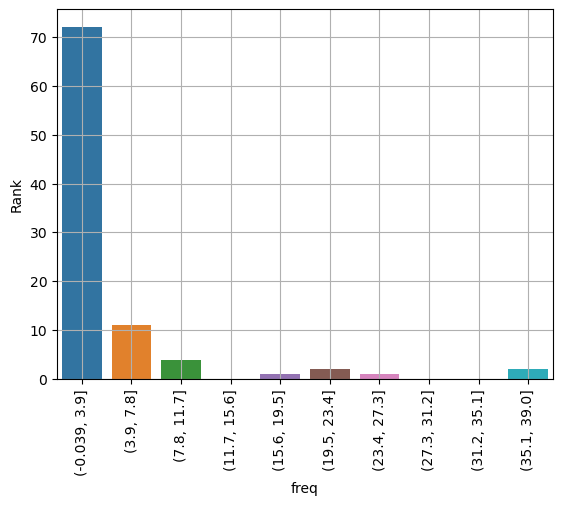

In [24]:
# barplot
fig,axes = plt.subplots()
ax = sb.barplot(X,x = 'freq',y = 'Rank',ax = axes)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
#X.plot(kind='bar',x = "freq",y = "Rank",ax = axes)
plt.grid()
plt.show()

### Moments in statistics
- The first central moment is always equal to zero, as it measures the deviation from the mean.
- The second central moment is the variance of the random variable, which quantifies the spread or dispersion.
- The third central moment is often referred to as the skewness, which measures the asymmetry of the distribution.
- The fourth central moment is related to the kurtosis, which measures the "tailedness" of the distribution.

- **Histplot** : To show frequency distribution of continuous data.       

- **Density Plot** : A density plot is smoothed histogram and shows the distribution of data values as continuous line and the y-axis is plotted as a proportion. The Proportion part is the key diffrence here and the reason that density plots are not same as histograms. 

<Axes: xlabel='Gold', ylabel='Count'>

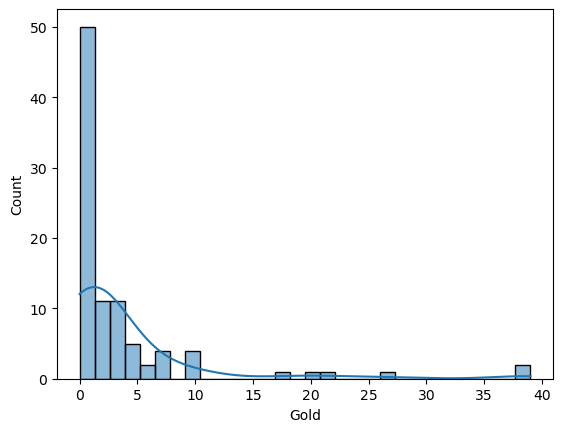

In [25]:
sb.histplot(medal_count['Gold'],kde = True)

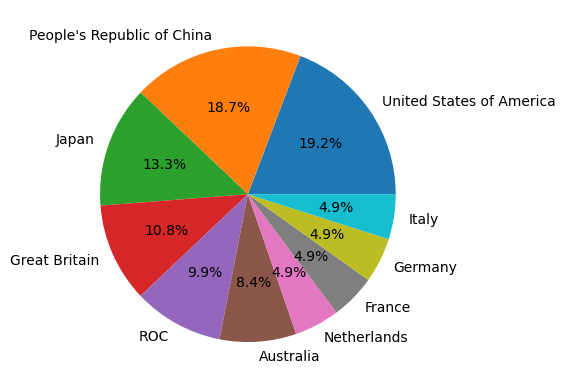

In [26]:
data = medal_count.iloc[0:10]
labels = data['Team/NOC']
values = data['Gold']/sum(data['Gold'])
fig, axes = plt.subplots()
plt.pie(values,labels = labels,autopct = '%.1f%%');

**Covariance**:
Covariance measures the degree to which two random variables change together. It indicates whether an increase in one variable corresponds to an increase or decrease in another variable. Specifically, the covariance between two variables, X and Y, denoted as Cov(X, Y).      

**Correlation**:
Correlation is a standardized measure of the linear relationship between two variables. It quantifies the strength and direction of the linear association between X and Y. The most commonly used measure of correlation is the Pearson correlation coefficient (r),

In [27]:
covarience = medal_count.cov()
correlation = medal_count.corr()

C:\Users\aakas\AppData\Local\Temp\ipykernel_1620\3121680567.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  covarience = medal_count.cov()
C:\Users\aakas\AppData\Local\Temp\ipykernel_1620\3121680567.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = medal_count.corr()


In [28]:
covarience

,Rank,Gold,Silver,Bronze,Total,Rank by Total
Rank,687.442029,-120.688406,-103.865942,-103.750000,-328.304348,553.615942
Gold,-120.688406,49.315101,43.231533,37.612202,130.158836,-106.262740
Silver,-103.865942,43.231533,43.908368,35.499649,122.639551,-101.360683
Bronze,-103.750000,37.612202,35.499649,38.568724,111.680575,-111.922160
Total,-328.304348,130.158836,122.639551,111.680575,364.478962,-319.545582
Rank by Total,553.615942,-106.262740,-101.360683,-111.922160,-319.545582,584.274427


<Axes: >

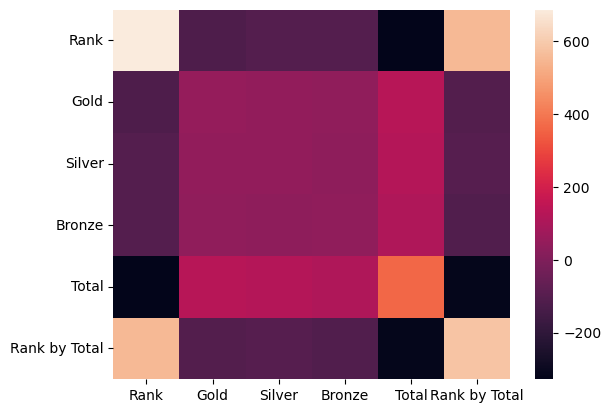

In [29]:
# Heatplot
sb.heatmap(covarience)

In [30]:
correlation

,Rank,Gold,Silver,Bronze,Total,Rank by Total
Rank,1.000000,-0.655477,-0.597835,-0.637166,-0.655877,0.873539
Gold,-0.655477,1.000000,0.929046,0.862425,0.970840,-0.626012
Silver,-0.597835,0.929046,1.000000,0.862646,0.969439,-0.632831
Bronze,-0.637166,0.862425,0.862646,1.000000,0.941941,-0.745573
Total,-0.655877,0.970840,0.969439,0.941941,1.000000,-0.692450
Rank by Total,0.873539,-0.626012,-0.632831,-0.745573,-0.692450,1.000000


<Axes: >

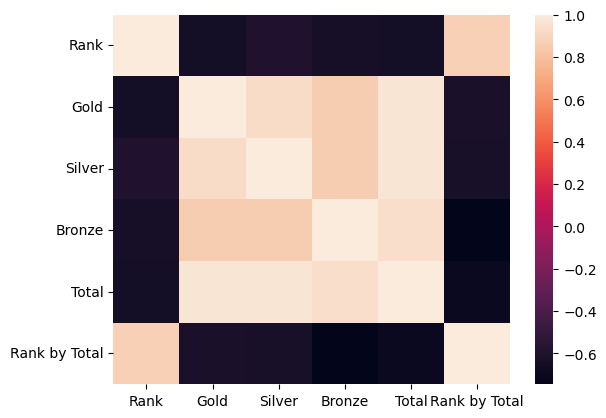

In [31]:
sb.heatmap(correlation)

### Scatter plots(Bivariate) : To show relation between two columns.

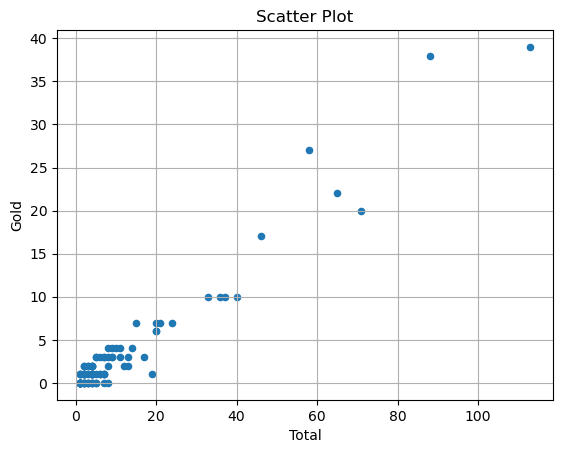

In [32]:
fig, ax1 = plt.subplots(nrows=1,ncols=1)
medal_count.plot.scatter(x = 'Total',y = "Gold",ax = ax1);
ax1.set_title('Scatter Plot');
plt.grid()

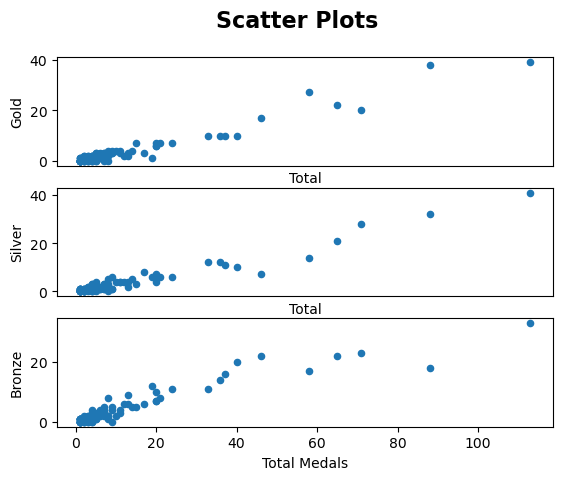

In [33]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1)
medal_count.plot.scatter(x = 'Total',y = "Gold",ax = ax1)
medal_count.plot.scatter(x = 'Total',y = "Silver",ax = ax2)
medal_count.plot.scatter(x = 'Total',y = "Bronze",ax = ax3)
ax1.set_xticks([])
ax2.set_xticks([])
ax3.set_xlabel('Total Medals')
fig.suptitle('Scatter Plots', fontsize=16, fontweight='bold');
plt.show()

**Violinplot** : Violin plots are variations of box plots which shows the distribution of values within the boxes. This helps to see where the debnsity of value biases.

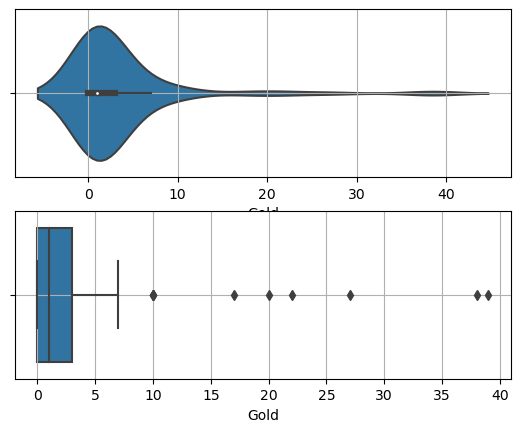

In [34]:
fig,(ax1,ax2 ) = plt.subplots(ncols=1,nrows=2)
sb.violinplot(x = medal_count['Gold'],ax = ax1)
sb.boxplot(x = medal_count['Gold'],ax = ax2)
ax1.grid()
ax2.grid()

## Data and Sampling Distributions 

**Population (N)** : Population refers to the entire group that we want to study and make conclusions about.       

**Sample (n)** : A sample is subset of that population, that is selected for the purpose of studying and drawing inferences from it.

**Sampling Techniques** : -      

1. **Random Sampling** : Creates a samples by randomly picking portions of the population. Simple random sampling gives each member of the population an equal chance of being chosen for sample.    

2. **Stratified sampling** : Random samples that are taken after we split the total data into sections or 'Strata'. Overall, Stratified sampling involves dividing the population into the sub population that may differ in important ways.    

3. **Systematic Sampling** : Systematic sampling is a method of selecting a sample from a larger population in a systematic and structured way. It involves selecting every nth item from the population list after a random start. The "n" value represents the sampling interval, which is calculated by dividing the population size by the desired sample size. Systematic sampling ensures that the sample is evenly distributed across the population and is relatively easy to implement.

4. **Convenience Sampling** : Convenience sampling, also known as availability sampling, is a non-probability sampling method where researchers select participants who are readily available and accessible. This method is often chosen for its convenience, but it may introduce bias because it does not ensure that the sample is representative of the entire population. Convenience sampling is frequently used in situations where it is challenging or impractical to use more rigorous sampling techniques.

5. **Purposive Sampling** : Purposive sampling, also referred to as judgmental or selective sampling, is a non-probability sampling technique in which the researcher deliberately selects specific individuals or items from the population based on certain criteria or characteristics. This method is used when the researcher believes that certain subgroups or individuals are crucial for the study's objectives. While purposive sampling is not random, it allows for a targeted and intentional selection of participants.

6. **Cluster Sampling**: Cluster sampling is a probability sampling method that divides the population into clusters or groups and then randomly selects some of these clusters to be part of the sample. After selecting the clusters, all individuals or items within the chosen clusters are included in the sample. Cluster sampling is often used when it is more practical and cost-effective to sample groups or clusters rather than individuals, especially when the population is large and geographically dispersed.

- **Sample Bias(Systematic error)** : A sample that misrepersent the populatiion








### Selection Bias :
- **Selection Bias** : Selection bias occurs when the sample used in a study is not representative of the population, it is supposed to represent. This can happen when certain individuals or groups are more likely to be included in the sample than others, leading to inaccurate or skewed results. Selection bias can undermine the validity and generalizability of research findings.

- **Data Snooping** : Data snooping, also known as data mining or data dredging, refers to the practice of repeatedly analyzing data or searching for patterns and relationships in data until a statistically significant result is found. It can lead to the identification of spurious correlations or patterns that do not have real-world significance. Data snooping can inflate the risk of Type I errors (false positives) and should be addressed through proper statistical methods, such as adjusting for multiple comparisons.

- **Vast Search Effect** :
The vast search effect is a phenomenon related to data snooping. It occurs when researchers explore a vast number of potential relationships or hypotheses within a dataset, increasing the likelihood of finding statistically significant but ultimately meaningless results due to chance. To mitigate the vast search effect, researchers should use appropriate statistical methods to control for multiple testing and report results transparently.

- **Target Shuffling** : Target shuffling is a technique used in data analysis, particularly in machine learning and statistical modeling. It involves randomly permuting or shuffling the values of the target variable (the variable we are trying to predict) while keeping the predictor variables (features) unchanged. This is done to assess the performance of a predictive model under a null hypothesis where there is no genuine relationship between the predictors and the target. It helps researchers evaluate whether their model's predictive power is better than what would be expected by chance.

- **Regression to the Mean** : Regression to the mean is a statistical phenomenon where, in a series of measurements or observations, extreme values tend to move closer to the average (mean) upon subsequent measurements. This occurs when an initial measurement is unusually high or low due to random variability rather than a real trend or change. When a follow-up measurement is taken, it is likely to be less extreme and closer to the population mean. Understanding regression to the mean is important when interpreting data, as it can lead to misconceptions about the effectiveness of interventions or treatments.

In [35]:
Player_Data = pd.read_csv('nfl-big-data-bowl-2022\players.csv')
Player_Data.head()

,nflId,height,weight,birthDate,collegeName,Position,displayName
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier
2,43534,6-0,205,1993-06-02,Illinois,SS,Clayton Fejedelem
3,43535,6-1,235,1992-12-22,Temple,MLB,Tyler Matakevich
4,44174,6-1,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen


In [36]:
Player_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2732 entries, 0 to 2731
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   nflId        2732 non-null   int64 
 1   height       2732 non-null   object
 2   weight       2732 non-null   int64 
 3   birthDate    2715 non-null   object
 4   collegeName  2724 non-null   object
 5   Position     2732 non-null   object
 6   displayName  2732 non-null   object
dtypes: int64(2), object(5)
memory usage: 149.5+ KB


**Sampling Distribution of statistics** 

**Central Limit Theorem** : If we take mean's of random samples from a distribution and we plot the mean's, the graph approaches to a normal distributionwhen we have taken sufficiently large number of such samples.      
- The theorem also says that the mean of mean's will be approximately equal to the mean of population means.  

Mean of weights in Population Data : 244.36456808199122
Mean of weights in Sample Datas : 244.04615384615383
As stated in Central Limit Theorem.


[Text(0.5, 1.0, 'Central Limit Theorem')]

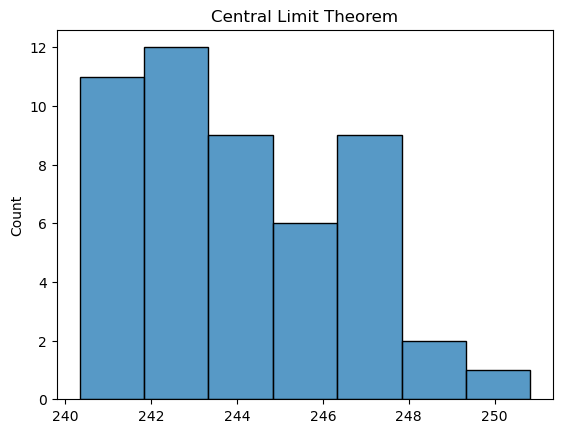

In [37]:
# Random Sampling
Sample_means = []
for i in range(0,50):
    Sample_means.append(np.mean(Player_Data['weight'].sample(frac= .1)))
 
print(f"Mean of weights in Population Data : {np.mean(Player_Data['weight'])}")
print(f"Mean of weights in Sample Datas : {np.mean(Sample_means)}")
print('As stated in Central Limit Theorem.')
fig,axes = plt.subplots()
sb.histplot(Sample_means,ax = axes)
axes.set(title = 'Central Limit Theorem')

In [38]:
def split_Mix(height):
    if height[1] == '-':
        return round(float(height[0]+'.'+height[2:]),2)
    elif height[1] != '-':
        return round(float(height[0]+'.'+height[1:]),2)
    else:
        return round(float(height))

Height_data = Player_Data['height'].apply(split_Mix)

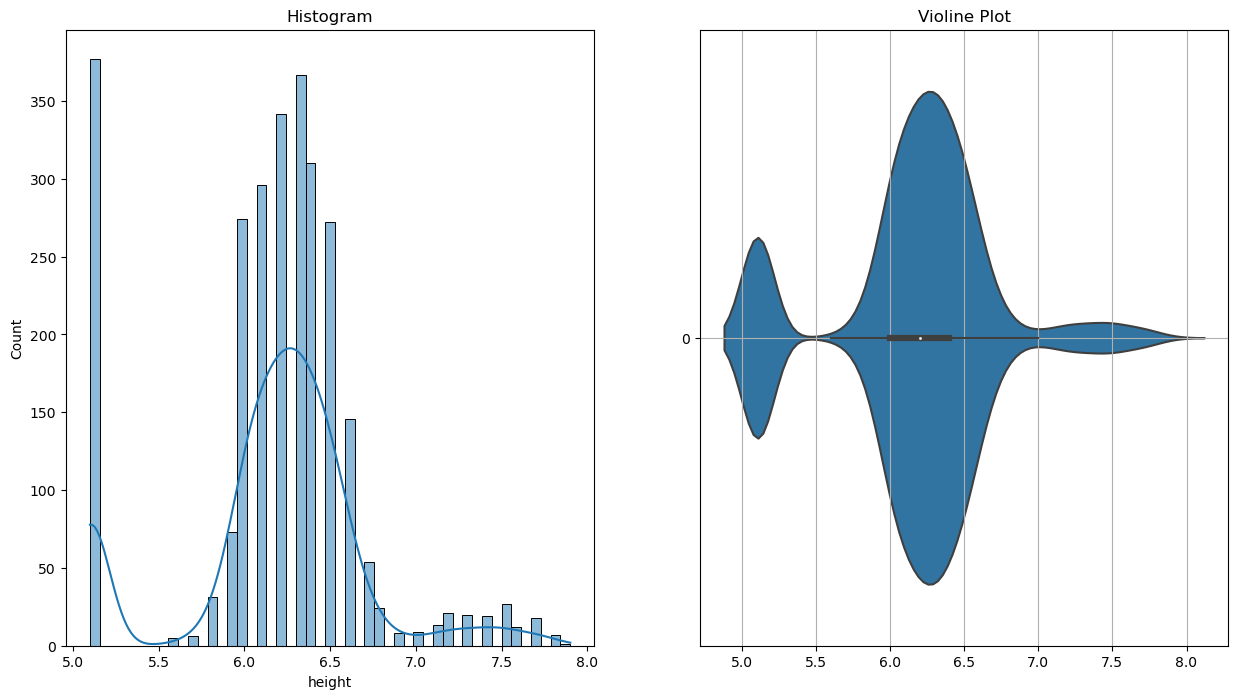

In [39]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize = (15,8))
ax1=sb.histplot(Height_data,ax = ax1,kde = True)
ax2 = sb.violinplot(Height_data,ax = ax2,orient = 'h')
ax1.set(title='Histogram')
ax2.set(title='Violine Plot')
plt.grid()
plt.show()


Mean of heights in Population Data : 6.172576866764277
Mean of heights in Sample Datas : 6.167451282051283
As stated in Central Limit Theorem.


[Text(0.5, 1.0, 'Central Limit Theorem')]

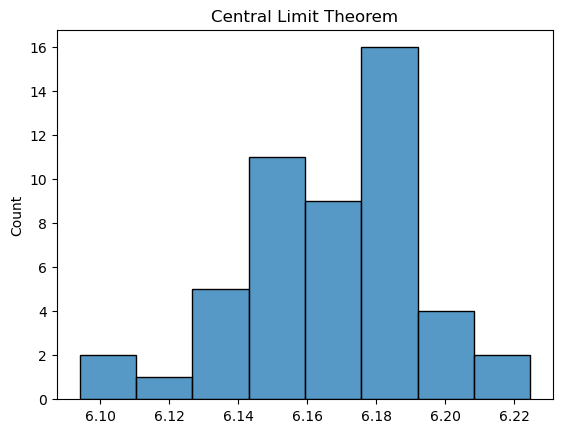

In [40]:
# Random Sampling
Sample_means = []
for i in range(0,50):
    Sample_means.append(np.mean(Height_data.sample(frac= .1)))

 
print(f"Mean of heights in Population Data : {np.mean(Height_data)}")
print(f"Mean of heights in Sample Datas : {np.mean(Sample_means)}")
print('As stated in Central Limit Theorem.')
fig,axes = plt.subplots() 
sb.histplot(Sample_means,ax = axes)
axes.set(title = 'Central Limit Theorem')

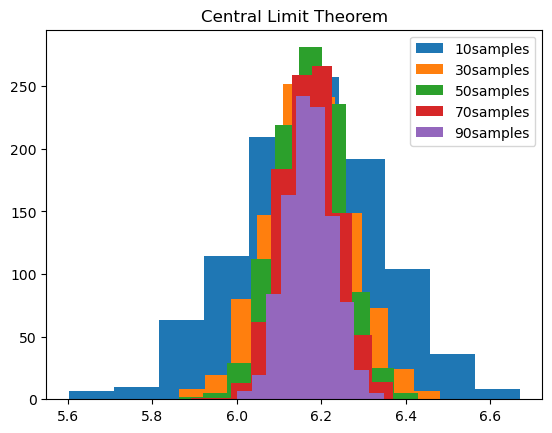

In [41]:
sample_amount = np.arange(10,100,20)
for x in sample_amount:
    samples = []
    for i in range(1000):
        samples.append(Height_data.sample(x).mean())
    plt.hist(samples);
plt.legend([str(z) + "samples" for z in sample_amount]);
plt.title("Central Limit Theorem");

**Standard Error (SE)** : The standard error (SE) is a statistical measure that quantifies the variability or precision of a sample statistic, such as the mean or proportion, when estimating a population parameter. In simpler terms, it tells us how much the sample statistic is likely to vary from the true population parameter on average due to random sampling.       
          SE = (Sample Standard Devaition) / sqrt(sample size (n))

- From previous example with the central limit theorem. We can see that as we increase the sample size, the error decreases, as proven by the formula.

In [42]:
# Standard Error
Sample_data = Height_data.sample(frac = 0.2)
print(f"Length of Sample is : {len(Sample_data)}")
print(f"Standard Deviation of sample of Height : {Sample_data.std()}")
print(f"Standard error in sample of Height : {Sample_data.sem()}")


Length of Sample is : 546
Standard Deviation of sample of Height : 0.5713666994429957
Standard error in sample of Height : 0.024452237409795918


**Bootstrap Sampling** : Bootstrap sampling is a resampling technique used in statistics and machine learning to estimate the sampling distribution of a statistic or to make inferences about a population when we have a limited dataset.       
- The main idea behind bootstrap sampling is to create multiple random samples (called "bootstrap samples") from the original dataset by sampling with replacement. These bootstrap samples are used to approximate the sampling distribution of a statistic or to perform statistical inference.

**Here are the key steps involved in the bootstrap sampling method** :

1. **Original Dataset** : Start with your original dataset, which typically represents a sample from a larger population.

2. **Random Sampling with Replacement** : Create multiple bootstrap samples by randomly selecting data points from the original dataset with replacement. This means that a data point can be selected more than once in a single bootstrap sample, while others may not be selected at all. Each bootstrap sample should have the same size as the original dataset.

3. **Calculate Statistic** : Calculate the statistic of interest (e.g., mean, median, variance, regression coefficients, etc.) for each of the bootstrap samples. This gives us a collection of statistic values.

4. **Analyze the Distribution** : Examine the distribution of the statistic values obtained from the bootstrap samples. We can calculate various statistics from this distribution, such as the mean, variance, confidence intervals, and percentiles.

5. **Make Inferences** : Bootstrap sampling is often used for making inferences about the population or estimating the uncertainty associated with a statistic. For example, we can estimate the mean and its confidence interval for the entire population based on the distribution of bootstrap sample means.

**Bootstrap sampling has several advantages** :

- It does not rely on strong parametric assumptions about the population distribution.
- It is versatile and can be applied to a wide range of statistical problems.
- It provides estimates of the sampling distribution of a statistic, allowing us to quantify uncertainty.

In [43]:
from sklearn.utils import resample

Bootsrape Statistics :
Original Mean: 6.172576866764277
bias : -6.30087847746097e-05
std error: 0.010390857266505222


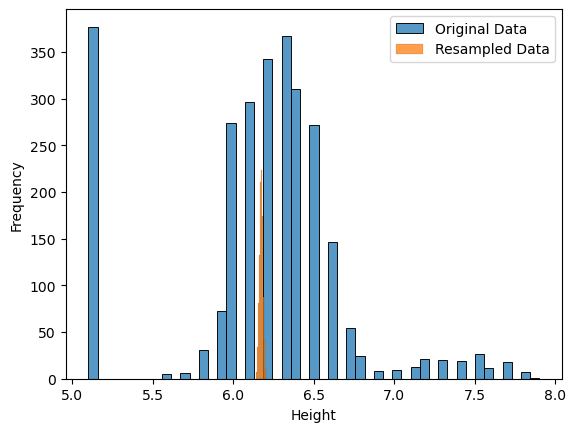

In [44]:
results = []
for i in range(1000):
    sample = resample(Height_data)
    results.append(sample.mean())
results = pd.Series(results)
print("Bootsrape Statistics :")
print(f"Original Mean: {Height_data.mean()}")
print(f"bias : {results.mean() - Height_data.mean()}")
print(f"std error: {results.std()}")
fig, axes = plt.subplots()
sb.histplot(Height_data,ax = axes,label='Original Data')
sb.histplot(results,ax = axes,bins = 10,label='Resampled Data' )

plt.legend()
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

### Confidence Intervals 

**Confidence Level** : A confidence level is a statistical concept that quantifies the degree of confidence or certainty that can be attributed to a statistical estimate, such as a mean, proportion, or regression coefficient, based on a sample of data. It is typically expressed as a percentage and represents the probability that the true population parameter (e.g., population mean or proportion) falls within a specific range or interval.       

**Confidence Intervals** : A confidence Interval(CI) is a range of values calculated from sample data that is likely to contain the true population with a certain level of confidence. It define a region where there is highest chances of populationan statistics to lie.     

To calculate Confidence interval we can follow steps :
1. Draw a random sample of size n with replacement(Bootstrapping) from the data.   
2. Record our sample statistics(mean, median etc).
3. Repeat steps (1 & 2) multiple times.
4. For an x% confidence level, trim [(100 - x)/2]% results off the ends of the distribution.
5. The trim points define the bounds of the confidence interval.       

**Note** : If the bounds of the intervals are too far apart from one another,then it can be a sign that not enough data was gatherd.  A larger confidence interval can also signal a more variable dataset.

In [45]:
import scipy.stats as st

In [46]:
# If we have fever than 30 items in our sample then we can use t-distribution.
Data = Height_data[0:25]
confidence = 0.95
C_I = st.t.interval(confidence=confidence, df = len(Data)-1, loc = np.mean(Data),scale= st.sem(Data))
print(f"Confidence interval : {C_I}")
print(f"Mean of data : {np.mean(Height_data)}")

Confidence interval : (5.785673545751037, 6.199926454248964)
Mean of data : 6.172576866764277


In [47]:
# If we have more than 30 items in our sample then we can use normal-distribution.
Data = Height_data.sample(frac = 0.05)
confidence = 0.95
C_I = st.norm.interval(confidence=confidence, loc = np.mean(Data),scale= st.sem(Data))
print(f"Confidence interval : {C_I}")
print(f"Mean of data : {np.mean(Height_data)}")

Confidence interval : (6.009538074668082, 6.19644732679177)
Mean of data : 6.172576866764277


**Normal / Gaussian Distribution** :     

**Error** : Difference between an instance and a predicted average value.      

**Standardize** : Method of scaling data up or down such that we can compare it to a normal distribution.      

**Z-Score** : Refers to number of standard deviation above the mean that the value is.    

**QQ-Plot** : Also known as Quantile- uantile plot, can be used to determine if a distribution of values is close to a normal distribution. If QQ-plot is roughly diagonal going upwards left to right then it can be considered a normal distribution. This plot orders the Z-scores from low to high, plotting the z-score on the y-axis and the x-axis is what quantile(percentile) that ranked value is in a normal distribution. 

<Axes: ylabel='Count'>

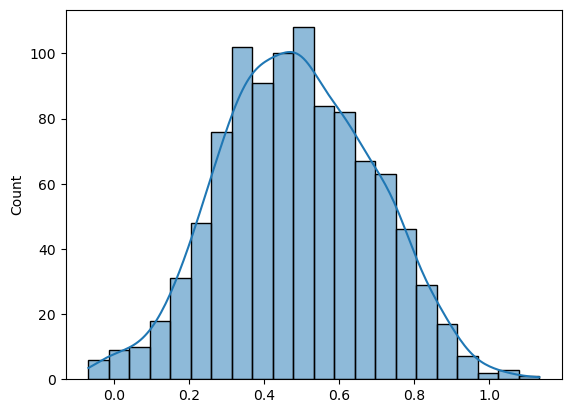

In [48]:
# Normal distribution
normal_distribution_data = np.random.normal(0.5,0.2,1000) #(mean, std, number of samples)
sb.histplot(normal_distribution_data,kde = True)

In [49]:
from scipy import stats

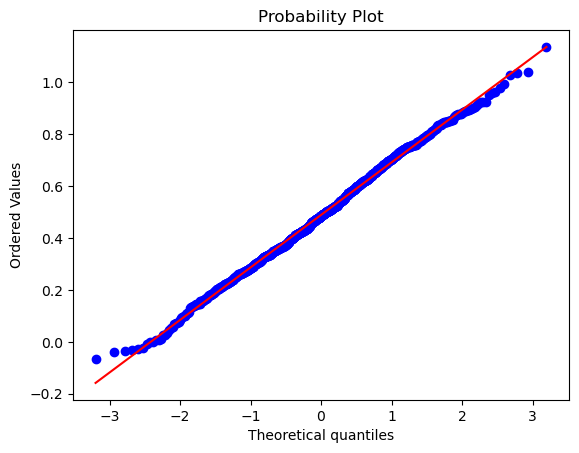

In [50]:
# Q-Q Plot
fig, axes = plt.subplots()
stats.probplot(normal_distribution_data,plot =axes);

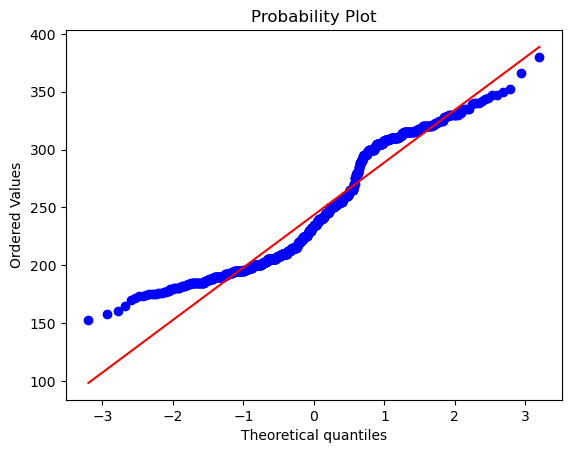

In [51]:
# Q-Q plot from weight data in dataset 
fig,ax = plt.subplots()
sample = Player_Data['weight'].sample(1000)
stats.probplot(sample,plot = ax);

**Lognormal Distribution** :

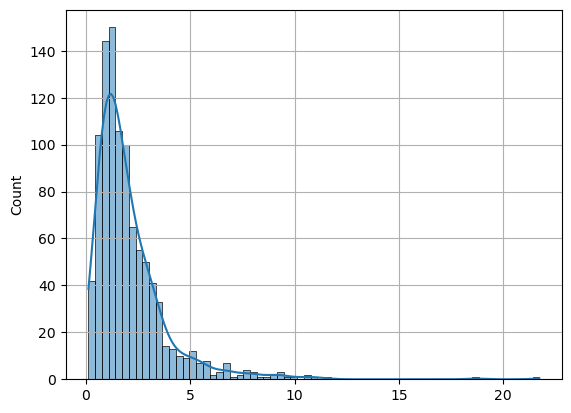

In [52]:
mu = 0.5
std = 0.7
lognoraml_distribution_data = np.random.lognormal(mu,std,1000)
fig ,axes = plt.subplots()
sb.histplot(lognoraml_distribution_data,ax = axes,kde = True)
plt.grid()
plt.show()

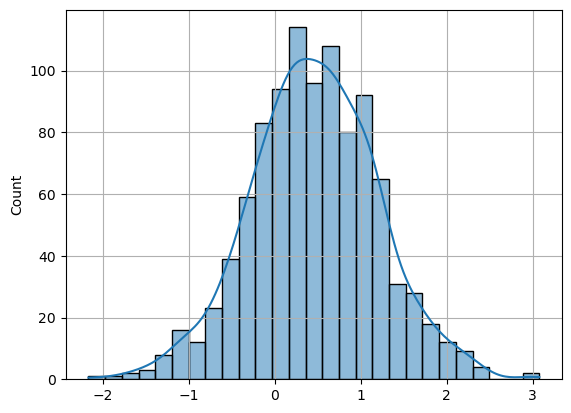

In [53]:
# Convert lognormal distributed data to normal distribution data
normal_data = np.log(lognoraml_distribution_data)
fig ,axes = plt.subplots()
sb.histplot(normal_data,ax = axes,kde = True)
plt.grid()
plt.show()

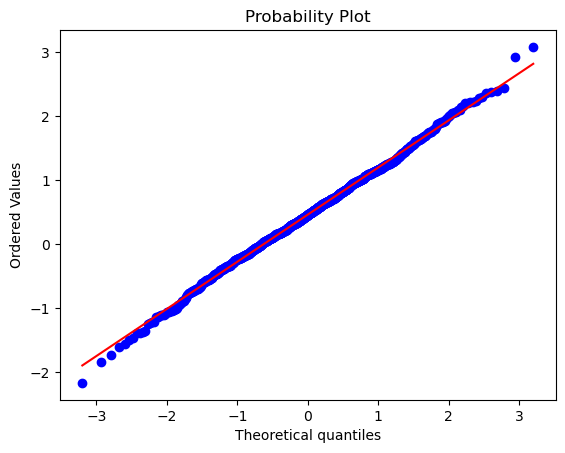

In [54]:
# Q-Q plot
fig, axes = plt.subplots()
stats.probplot(normal_data,plot =axes);

**t-Distribution** : A normal distribution with thicker and longer tails. This is the distribution that sample statistics tend to follow. As we take more samples, the distribution will more closely resemble a normal distribution.
![Alt text](image.png)

***Probability Distribution function*** :
----------------------------------------

**probabiltiy mass function (Distcrete Probability Distribution)**
- Uniform
- bernouli
- bionomial distribution
- possion

**Probability density function (Continues Probabiltiy Distribution)**
- uniform
- nornmal(SND)
- lognormal
- power law
- pareto



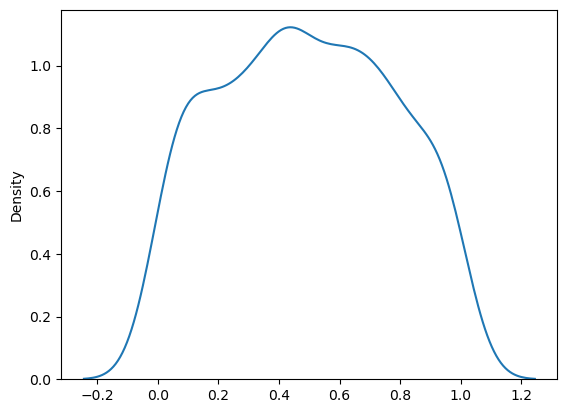

In [55]:
# uniform distribution
uniform_data = np.random.uniform(size= 500)
sb.kdeplot(uniform_data);


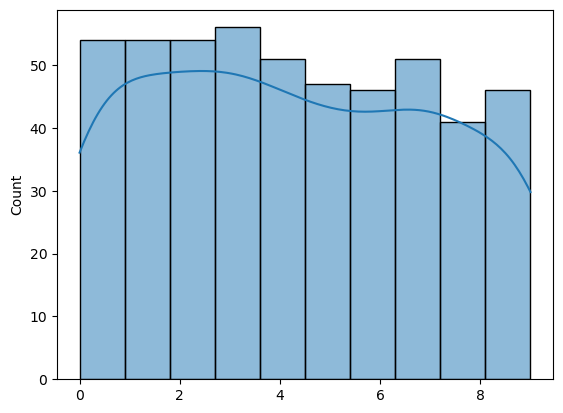

In [56]:
uniform_data_1 = np.random.randint(0,10,size = 500)
sb.histplot(uniform_data_1,kde = True);

<Axes: ylabel='Count'>

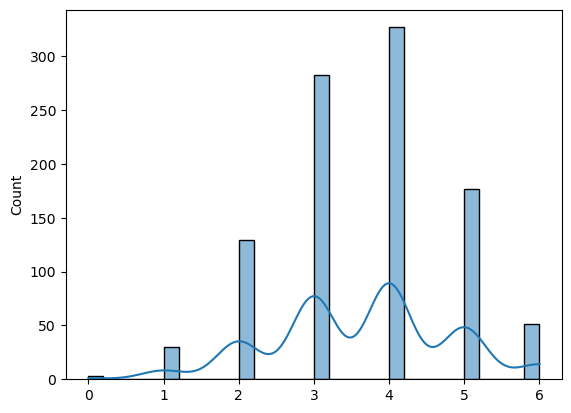

In [57]:
# Bionomial Distribution :
no_trials = 6
probability = 0.6
bionomial_data=np.random.binomial(no_trials,probability,1000)
sb.histplot(bionomial_data,kde = True)

<Axes: ylabel='Count'>

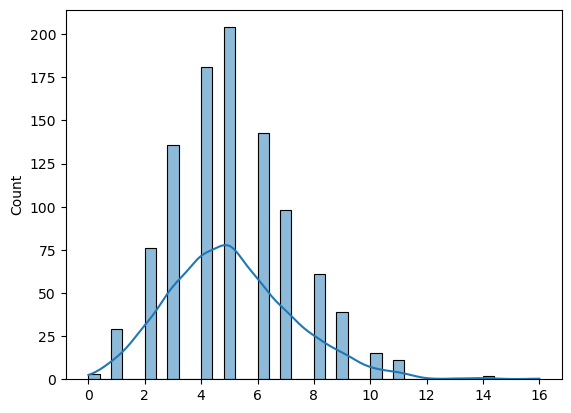

In [58]:
# Poission distribution(Discrete data)
poission_data = np.random.poisson(lam = 5 , size = 1000) # lam = 5 : means 5 event per intervall
sb.histplot(poission_data,kde = True)


<Axes: ylabel='Count'>

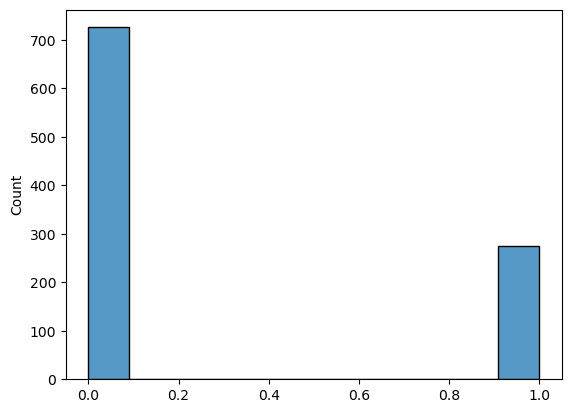

In [59]:
# bernouli distribution : 
p = 0.3
sample_size= 1000
bernouli_data=np.random.choice([0,1],size = sample_size,p = [1-p,p])
sb.histplot(bernouli_data)

### Statistical Experiment and significant testing

**A/B testing** : A/B testing, also known as split testing or bucket testing, is a statistical method used in marketing, product development, and web optimization to assess and compare the performance of two or more variations of a webpage, app, email, or other digital content. The primary goal of A/B testing is to determine which variation is more effective at achieving a specific objective, such as increasing click-through rates, conversion rates, or user engagement.        
- An interresting example is headlines on news articles, websites will test headlines against one another by showing diffrent headlines to readers of the same article to see ehich is better.        

**Hypothesis Testing** :  Hypothesis tests, also called significance test are designed to help us manage the human tendency to incorrectly understand, interpret and predict natural random behaviour. It does this by testing change due to a phenomenon compared to a baseline of some kind. In this, we make inferences about population parameters based on a sample of data. It's a systematic process that helps researchers, analysts, and scientists evaluate whether observed results or differences are statistically significant or if they could have occurred due to random chance.    

The first step is to define two competing hypotheses:

- **Null Hypothesis (H0)**: This is the default or status quo hypothesis, often stating that there is no effect, no difference, or no relationship in the population. It represents what you aim to test against.
- **Alternative Hypothesis (Ha or H1)**: This is the hypothesis you want to support or demonstrate. It typically asserts that there is a significant effect, difference, or relationship in the population.


- **Premutation test** : Used to test hypotheses, we will mix groups together and draw samples with size equivalent to the original grouup sizes and then collect our samples statistics o them. It is also a resampling technique as Bootstrapping but here we are not replacing our selection..

In [60]:
# Permutation Test :
def permutation_function(dataframe,data_col, grouping_col, interations, statistics_function):
    output = {}

    groups = dataframe[grouping_col].value_counts().index
    values = dataframe[grouping_col].value_counts()

    for x in range(interations):
        for i in groups:
            sample_amount = dataframe[grouping_col].value_counts()[i]
            sample_data = dataframe[data_col].sample(sample_amount,replace = False).to_list()
            sample_metric = statistics_function(sample_data)
            try:
                output[i].append(sample_metric)
            except (KeyError, AttributeError):
                output[i] = [sample_metric]
    
    final_output = pd.DataFrame(output)
    return final_output

    

In [61]:
a_b_data = pd.read_csv('Data_ab_testing\AB.csv')
a_b_data.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [62]:
i = a_b_data[((a_b_data['group'] == 'treatment') ==
 (a_b_data['landing_page'] == 'new_page')) == False].index

df2 = a_b_data.drop(i)
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [63]:
#permutation_data_100 = permutation_function(a_b_data,'converted','group',100,np.mean)
#permutation_data_500 = permutation_function(a_b_data,'converted','group',500,np.mean)
#permutation_data_5000 = permutation_function(a_b_data,'converted','group',5000,np.mean)

In [64]:
/#permutation_data = {100: permutation_data_100, 500: permutation_data_500, 5000: permutation_data_5000}

#for num_iterations, data in permutation_data.items():
#    filename = f'permutation_data_{num_iterations}.csv'
#   pd.DataFrame(data).to_csv(filename, index=False)


In [65]:
permutation_data_100 = pd.read_csv('permutation_data_100.csv')
permutation_data_500 = pd.read_csv('permutation_data_500.csv')
permutation_data_5000 = pd.read_csv('permutation_data_5000.csv') 

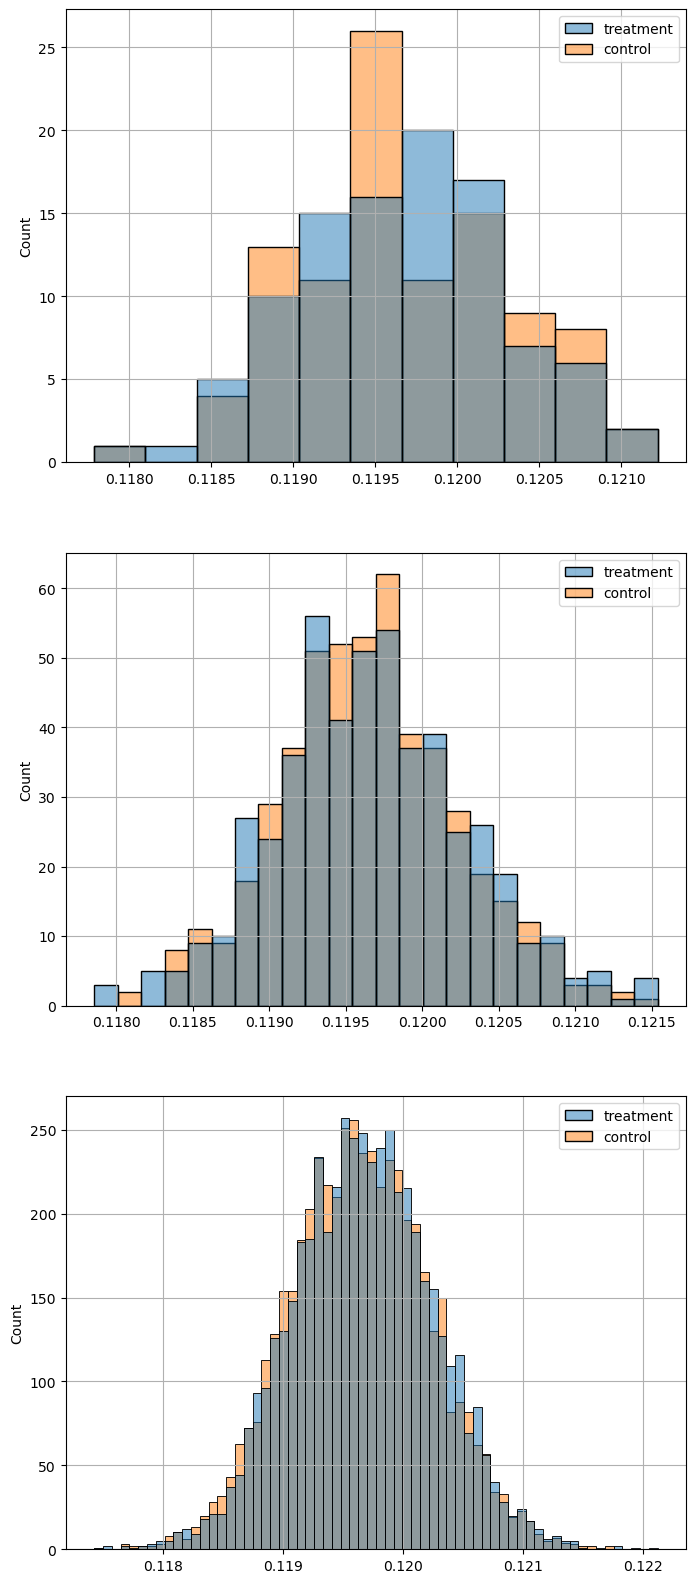

In [66]:
fig,(axes1,axes2,axes3) = plt.subplots(ncols = 1,nrows = 3,figsize = (8,20))
ax1 = sb.histplot(permutation_data_100,ax = axes1)
ax1.grid()
ax2 = sb.histplot(permutation_data_500,ax = axes2)
ax2.grid()
ax3 = sb.histplot(permutation_data_5000,ax = axes3)
ax3.grid()
plt.show()


In [67]:
np.random.seed(0)
values = np.random.randn(100)
x = np.arange(-50,50)
print(len(x))

100


**Important Definations** :

**p-value** : Is is a measure that helps assess the strength of evidence against a null hypothesis. It quantifies the probabilty of obtaining results as extreme as, or more extreme then, the observed data if the null hypothesis were true.     

**Confidence Interval** : A confidence interval (CI) is a range of values calculated from sample data that is likely to contain the true population with a certain level of confidence. It defines a region where there is the highest chances of population statistics to lie.       

**Significance value (alpha)** : It repersents the probability of making a type 1 error. 

**Type-1 Error and type-2 Error** :
- **Type-1 Error** : Incorrectly reject of true null hypothesis.    
- **Type-2 Error** : Fail to reject a false null hypothesis.

**Z-Test** : The Z-test is a statistical hypothesis test used to determine whether the means of two populations(population and sample) are significantly different when the population standard deviation is known or when the sample size is large (typically n > 30).

- Example : The average hight of all residents in a city is 168cm with population standard deviation 3.9cm. A doctor belives the mean to be diffrent. He measured the height of 36 individuals and found the average height to be 169.5cm. then -
1. State null and alternate hypothesis.
2. At 95% confidence interval, is there enough evidence to reject the null hypotheisis?


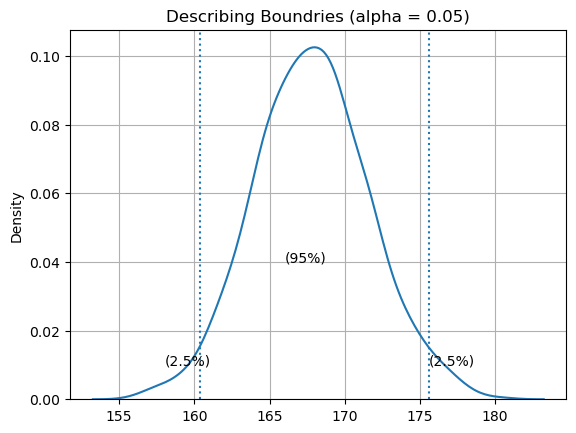

In [68]:
sample_mean = 169.5
population_mean = 168
population_std = 3.9
C_I = 95
sample_size = 36
significance_value = 1 - (C_I)/100
# Null Hypothsis
H_o = 168 # The mean of sample is equal to population mean

# Alternate Hypothsis :  The mean of sample is not equal to population mean(Two tail test)
# Describing the boundaries
fig,axes = plt.subplots()
normal_distribution_data = np.random.normal(168,3.9,1000) #(mean, std, number of samples)
normal_distribution_data_sample = np.random.normal(169.5,3.9,36)
sb.kdeplot(normal_distribution_data,ax = axes)
plt.axvline(x = 175.6,linestyle = ':')
plt.axvline(x = 160.4,linestyle = ':')
plt.text(x = 166,y = 0.04,s = "(95%)")
plt.text(x = 175.6,y = 0.01,s = "(2.5%)")
plt.text(x = 158,y = 0.01,s = "(2.5%)")
plt.title('Describing Boundries (alpha = 0.05)')
plt.grid()
plt.show()

In [69]:
# Statistical Analysis
# Calculate the z-score
z_score = (sample_mean-population_mean)/(population_std /(np.sqrt(sample_size)))
print(f"z_score : {z_score}")
# Calculate the critical z-value
z_critical_value = stats.norm.ppf(C_I/100)
print(f"z_critical_value : {z_critical_value}")

# Calculate the p-value
p_value_right = 1 - stats.norm.cdf(z_score)
p_value_left = stats.norm.cdf(-z_score)
p_value = p_value_right + p_value_left
print(f"p_value : {p_value}")
print()

if p_value > significance_value:
    print('We fail to reject the null hypothesis.')
else:
    print('We reject null hypothesis.')

z_score : 2.3076923076923075
z_critical_value : 1.6448536269514722
p_value : 0.021016256227518678

We reject null hypothesis.


In [70]:
from statsmodels.stats.weightstats import ztest
normal_distribution_data_sample = np.random.normal(169.5,3.9,36)
ztest(normal_distribution_data_sample, value = H_o)

(3.844102972082843, 0.00012099419700101874)

**t-Test** : The t-test is a statistical hypothesis test used to assess whether there is a significant difference between the means of two groups when the population standard deviation is unknown or when the sample size is small (typically n < 30).      

- **One sample t-test** : With respect to one independent sample.
- **Two sample t-test** : With respect to two independent samples.
- **Paired t-test** : Two sample from the same population on a diffrent time interval.

In [71]:
Population_data = np.random.normal(200,10,1000)
sample = np.random.choice(Population_data, 25)
 

**One sample t-test :**

In [72]:
population_mean = np.mean(Population_data)
sample_mean = np.mean(sample)
sample_std = np.std(sample)
print(f'Population mean : {population_mean} \nSample mean : {sample_mean} \nSample std : {sample_std}')
C_I = 95  
significance_value = 0.05

Population mean : 199.9465278397177 
Sample mean : 199.93163519881287 
Sample std : 8.68053928152839


In [73]:
# Calculate the t-score
t_score = (sample_mean - population_mean) / (sample_std / np.sqrt(sample_size))
print(f"t_score : {t_score}")

# Calculate the critical t-value
t_critical_value = stats.t.ppf(1 - significance_value / 2, df=sample_size - 1)
print(f"t_critical_value : {t_critical_value}")

# Calculate the p-value
p_value = 2 * (1 - stats.t.cdf(abs(t_score), df=sample_size - 1))
print(f"p_value : {p_value}")
print()

if p_value > significance_value:
    print('We fail to reject the null hypothesis.')
else:
    print('We reject the null hypothesis.')


t_score : -0.0102938126919304
t_critical_value : 2.0301079282503425
p_value : 0.9918453232141007

We fail to reject the null hypothesis.


In [74]:
t_score,p_value = stats.ttest_1samp(sample,population_mean)
print(f"t_score : {t_score}")
print(f"p_value : {p_value}")
if p_value > significance_value:
    print('We fail to reject the null hypothesis.')
else:
    print('We reject the null hypothesis.')

t_score : -0.008404862867671602
p_value : 0.9933634438583892
We fail to reject the null hypothesis.


**Two-sample t-test** :

In [75]:
sample_2 = np.random.choice(Population_data, 25)

In [76]:
print('First sample : ',sample)
print('Second sample : ',sample_2)

First sample :  [196.44505225 218.0224223  210.41568389 188.66407174 202.46602186
 204.57309647 192.03224694 189.36304409 190.76087984 203.191184
 202.95075783 190.1017745  195.38106185 211.17283466 199.91790118
 207.77276964 202.97514354 196.29835835 202.13017167 200.10185519
 201.6066119  195.16750458 218.33435362 195.36978246 183.07629563]
Second sample :  [206.47967791 196.94047425 199.00991689 199.79870896 183.15482745
 216.85792303 201.31573968 183.15482745 208.86864687 194.01849547
 187.83923419 194.68006191 196.11845808 191.6480731  215.42796338
 193.59274276 209.00054243 201.00581209 192.19695593 214.5871475
 206.5726769  192.91614948 183.50783026 204.16099634 213.4803578 ]


In [77]:
print('First sample mean : ',np.mean(sample))
print('Second sample mean: ',np.mean(sample_2))
print('First sample std: ',np.std(sample))
print('Second sample std: ',np.std(sample_2))

First sample mean :  199.93163519881287
Second sample mean:  199.4533696035454
First sample std:  8.68053928152839
Second sample std:  9.945756328688121


In [78]:
# Null hypothesis : Both samples mean is will be same 
t_stats,p_value = stats.ttest_ind(sample,sample_2)
print(f"t-stats : {t_stats} \np_value : {p_value} ")
print(f"significance_value : {significance_value}")

if p_value > significance_value:
    print('We fail to reject the null hypothesis.')
else:
    print('We reject the null hypothesis.')

t-stats : 0.17748581780844794 
p_value : 0.8598736743874833 
significance_value : 0.05
We fail to reject the null hypothesis.


**Paired t-test**

In [79]:
# Null hypothesis : Both samples mean is will be same 
t_stats,p_value = stats.ttest_rel(sample,sample_2)
print(f"t-stats : {t_stats} \np_value : {p_value} ")
print(f"significance_value : {significance_value}")

if p_value > significance_value:
    print('We fail to reject the null hypothesis.')
else:
    print('We reject the null hypothesis.')

t-stats : 0.1574220290906106 
p_value : 0.8762291815946676 
significance_value : 0.05
We fail to reject the null hypothesis.


**Chi-Square test** : The chi-square test is a statistical test used to determine if there is a significant association between categorical variables in a contingency table. It is commonly used to test whether observed frequencies of categories in a sample differ from expected frequencies, assuming that there is no association between the variables.

In [80]:
data = sb.load_dataset('tips')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [82]:
data[['sex','smoker']]

,sex,smoker
0,Female,No
1,Male,No
2,Male,No
3,Male,No
4,Female,No
...,...,...
239,Male,No
240,Female,Yes
241,Male,Yes
242,Male,No


In [84]:
test_table = pd.crosstab(data['smoker'],data['sex'])
test_table

sex,Male,Female
smoker,,
Yes,60,33
No,97,54


In [85]:
test_table_values = test_table.values
test_table_values

array([[60, 33],
       [97, 54]], dtype=int64)

In [86]:
stats_test,p_value,dof,Expected_value =  stats.chi2_contingency(test_table_values)
stats_test,p_value,dof,Expected_value

(0.0,
 1.0,
 1,
 array([[59.84016393, 33.15983607],
        [97.15983607, 53.84016393]]))

In [89]:
chisqaure = sum([(o-e)**2 /e for o,e in zip(test_table_values,Expected_value)])
chisqaure

array([0.00068987, 0.00124494])

In [90]:
chi_square_test = sum(chisqaure)
chi_square_test

0.001934818536627623

In [104]:
crititcal_value = stats.chi2.ppf(C_I/100,dof)
print(f"crititcal_value : {crititcal_value}")

if chi_square_test>= crititcal_value:
    print('Reject the null hypothesis, there is a relationship between two categorical values.')
else:
    print('Accept the null hypothesis there is no relation between two categorical variable.')


crititcal_value : 3.841458820694124
Accept the null hypothesis there is no relation between two categorical variable.


**Anova Test** : An Anova is a statistical method used to compare the mean of 2 or more groups. For this first we identify 2 key terms: (1) Factors(Variable) : Main variable, (2) Levels : Categories in main variable.     
**Types of Anova** :
1. One way Anova : One factor with atleast 2 levels, these levels are independent.
2. Repeated measure Anova : One factor with atleast 2 levels, levels are independent.Repeated measures ANOVA is used when we have a dataset with multiple measurements taken on the same subjects or items under different conditions or time points.
3. Factorial Anova : Two or more factors(each of which with atleast 2 levels) levels can be either independent or dependent.

**One way ANOVA**        
**Example :** Doctors wants to test a new mediciens which reduces headache. They splits the participents into 3 groups(15mg, 30mg, 45mg). Later on the doctor asks the patiant to rate the headavhe between 1 to 10. Are there any diffrences between  the 3 conditions using alpha = 0.05.

In [105]:
group_15mg = np.array([9,8,7,8,8,9,8])
group_30mg = np.array([7,6,6,7,8,7,6])
group_45mg = np.array([4,3,2,3,4,3,2])
alpha = 0.05
# one-way ANOVA
f_statistic, p_value = stats.f_oneway(group_15mg, group_30mg, group_45mg)

print("F-statistic:", f_statistic)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference among the groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference among the groups.")

F-statistic: 86.3333333333334
P-value: 5.956341358737431e-10
Reject the null hypothesis. There is a significant difference among the groups.
